**INTRODUCTION TO CLUSTERING**

**Course Overview**

Upon completion of this study unit, you should be able to:

*   Have a general understanding of how a clustering algorithm works
*   Build a clustering algorithms using SKLearn
*   Evaluate clustering models performance

**CLUSTERING**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups.

We will be using the K-means Algorithm for this task:

K-means, also known as k-center algorithm, is an Unsupervised Machine Learning Algorithm. This simply means unlike supervised machine learning algorithms, there are no labels provided in the data, hence it uses a different approach to solve problems. It is a ‘data-driven’ approach i.e the ‘data speaks for itself’.




USE CASE: Customer Segmentation based on Annual income
The dataset is a very simple data just to demonstrated with code how k-means works. Find below the link to the dataset and the code used uploaded to the Github repository.
REQUIRED PYTHON LIBRARIES
- Numpy
- Pandas
- Matlplotlib
- ScikitLearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI Invasion 2021

/content/drive/MyDrive/AI Invasion 2021


In [ ]:
%pwd

'/content/drive/My Drive/AI Invasion 2021'

In [ ]:
#Importing the dataset
df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Separating the data into X and Y.
Not Dependent and Independet as in Supervised. Remember that Clustering has no labels. Y here represents what we want to cluster with i.e our reference point

Y here is the annual income as that defines the objective of the analysis. For X, the ‘CustomerID’ column will be omitted because it plays no role here.


In [ ]:
X = df.iloc[:, [2,3,4]]
y = df.iloc[:, 3]

In [ ]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

Visualize data points before Clustering.

Text(0.5, 1.0, 'Clusters before K-means')

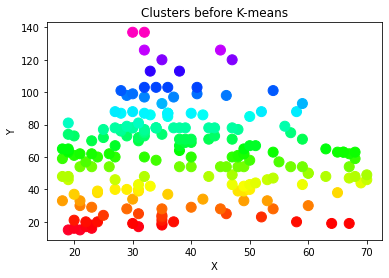

In [ ]:
#Visualize data before K-means is applied
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, s=100, cmap='gist_rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters before K-means')

Split Dataset into Train and test set for model development.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Find K using the Elbow method, and plot results using Matplotlib.

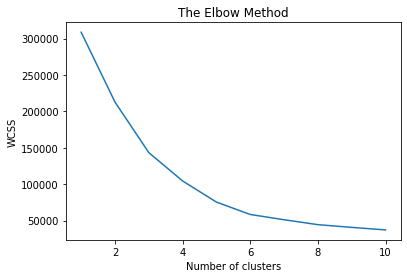

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
#Initiate Wcss using empty list
wcss = []
#initiate iteration process using a for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #Append results to wcss list
    wcss.append(kmeans.inertia_)
#Plot results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As can be seen optimal value of k is 5.

Now, Print Labels predicted by the model.

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
#Centers identified and calculates
centers = kmeans.cluster_centers_
centers

array([[40.66666667, 87.75      , 17.58333333],
       [43.08860759, 55.29113924, 49.56962025],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

In [ ]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

Visualize Clusters by K-means

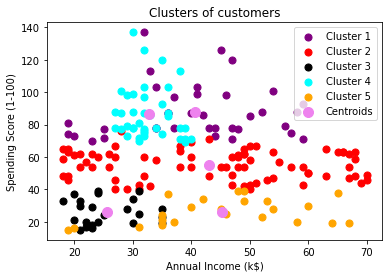

In [ ]:
#Convert X to an np array 
X_1=np.array(X)
# Visualising the clusters
#1st CLuster
plt.scatter(X_1[y_kmeans == 0, 0], X_1[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
#2nd Cluster
plt.scatter(X_1[y_kmeans == 1, 0], X_1[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
#3rd Cluster
plt.scatter(X_1[y_kmeans == 2, 0], X_1[y_kmeans == 2, 1], s = 50, c = 'black', label = 'Cluster 3')
#4th Cluster
plt.scatter(X_1[y_kmeans == 3, 0], X_1[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#5th Cluster
plt.scatter(X_1[y_kmeans == 4, 0], X_1[y_kmeans == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
#Number of centriods against lables
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'violet', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Visualize actual clusters versus Predicted Clusters for comparison.

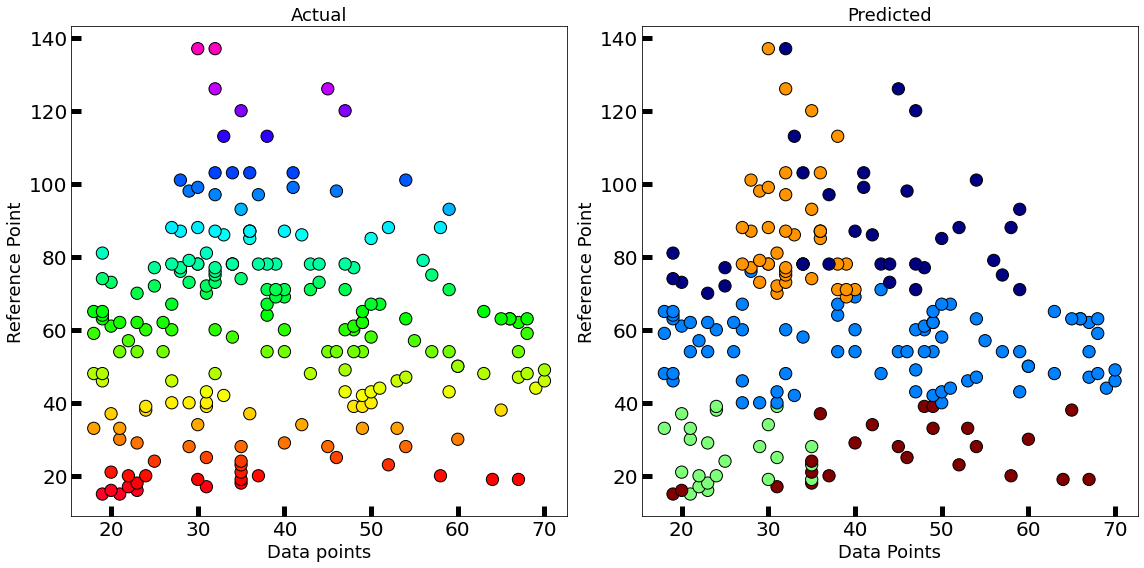

In [ ]:
#Visualizing Clusters after k-means
new_labels = kmeans.labels_
#Visualize data with reference to before and after k-means clustering
#Actual vs predicted plot
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Data points', fontsize=18)
axes[0].set_ylabel('Reference Point', fontsize=18)
axes[1].set_xlabel('Data Points', fontsize=18)
axes[1].set_ylabel('Reference Point', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.tight_layout()

# Bonus on How to Plot Clusters using the Yellowbrick Library
As a bonus tip, Let's use a special library which makes it easier with fewer lines of code to calculate and visualize the Elbow method plot and optimal k-value for the model.
This library is called the ‘ YelloBrickVisualizer’. It works with the Matplolib and ScikitLearn as major wrappers and works best with ScikitLearn version 0.20 or later and Matplotlib version 3.0.1 or later.
Take a look at the plot for the Elbow method and K-value using this Library.

### Install Yellowbrick using
- https://anaconda.org/DistrictDataLabs/yellowbrick
- https://pypi.org/project/yellowbrick/

In [ ]:
#import Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


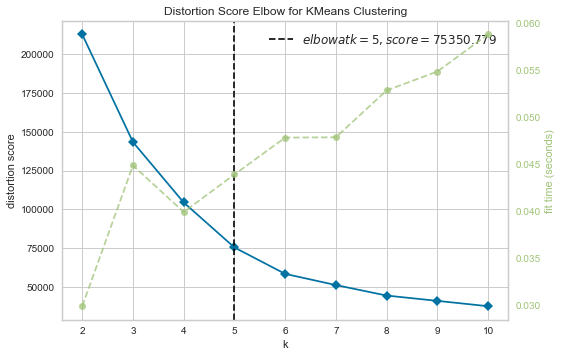

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X)       
visualizer.show()        